In [1]:
!pip install -U openmim
!mim install mmcv-full
!mim install mmdet==2.28.1

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 198.1 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.13.0
    Uninstalling Pygments-2.13.0:
      Successfully uninstalled Pygments-2.13.0
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.0/793.0 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
Saved /tmp/tmp6v4wq0ip/mmdet-2.25.0.tar.gz
Successfully downloaded mmdet
Get 'mim' extra requireme

In [2]:
!mim list

Package         Version    Source
--------------  ---------  ----------------------------------------------
mmcls           0.23.1     https://github.com/open-mmlab/mmclassification
mmcv-full       1.5.3      https://github.com/open-mmlab/mmcv
mmdet           2.28.1     https://github.com/open-mmlab/mmdetection
mmsegmentation  0.26.0     http://github.com/open-mmlab/mmsegmentation


### 准备配置文件

查询 yolov3 的标准配置文件

In [3]:
!mim search mmdet --model "yolov3"

--------------------------------------------------------------------------------
config id: yolov3_d53_320_273e_coco
architecture                                            darknet
coco/box_ap                                             27.9
config                                                  configs/yolo/yolov3_d...
epochs                                                  273
inference_time(ms/im)[V100,PyTorch,1,FP32,(320, 320)]   15.65
model                                                   yolov3
paper                                                   URL,Title
readme                                                  configs/yolo/README.md
training_data                                           coco
training_memory(GB)                                     2.7
training_resources                                      8x v100 gpus
training_techniques                                     sgd with momentum,wei...
weight                                                  https://download.ope

下载标准配置文件和 ckpt 文件

In [4]:
!mim download mmdet --config yolov3_mobilenetv2_mstrain-416_300e_coco --dest ./config/_base_

processing yolov3_mobilenetv2_mstrain-416_300e_coco...
yolov3_mobilenetv2_mstrain-416_300e_coco_20210718_010823-f68a07b3.pth exists in /output/mmdet/config/_base_
Successfully dumped yolov3_mobilenetv2_mstrain-416_300e_coco.py to /output/mmdet/config/_base_


继承标准配置文件形成自己的配置

In [15]:
from mmcv import Config

config = Config.fromfile('config/yolov3_mobilenetv2_mstrain-416_30e_bloods.py')
print(config.pretty_text)  # 把已有的继承进来，再进行修改

checkpoint_config = dict(interval=2, max_keep_ckpts=2)
log_config = dict(interval=50, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = 'config/_base_/yolov3_mobilenetv2_mstrain-416_300e_coco_20210718_010823-f68a07b3.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
auto_scale_lr = dict(enable=False, base_batch_size=192)
model = dict(
    type='YOLOV3',
    backbone=dict(
        type='MobileNetV2',
        out_indices=(2, 4, 6),
        act_cfg=dict(type='LeakyReLU', negative_slope=0.1),
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://mmdet/mobilenet_v2')),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[320, 96, 32],
        out_channels=[96, 96, 96]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=1,
        in_channels=[96, 96, 96],
        out_chan

### 准备训练模型

In [17]:
!mim train mmdet config/yolov3_mobilenetv2_mstrain-416_30e_bloods.py

/usr/local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
Training command is /usr/local/bin/python /usr/local/lib/python3.8/site-packages/mmdet/.mim/tools/train.py config/yolov3_mobilenetv2_mstrain-416_30e_blood

load checkpoint from local path: work_dirs/yolov3/yolov3_mobilenetv2_mstrain-416_30e_bloods/latest.pth


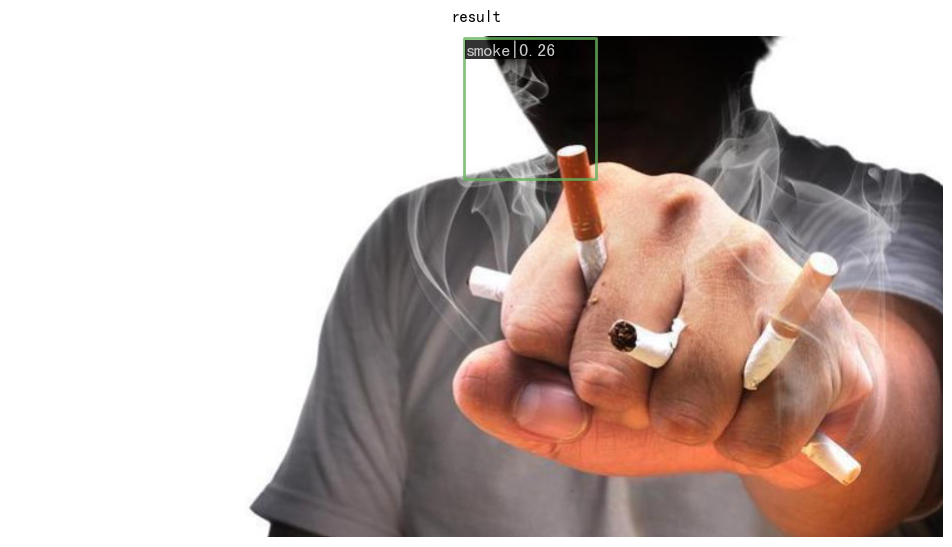

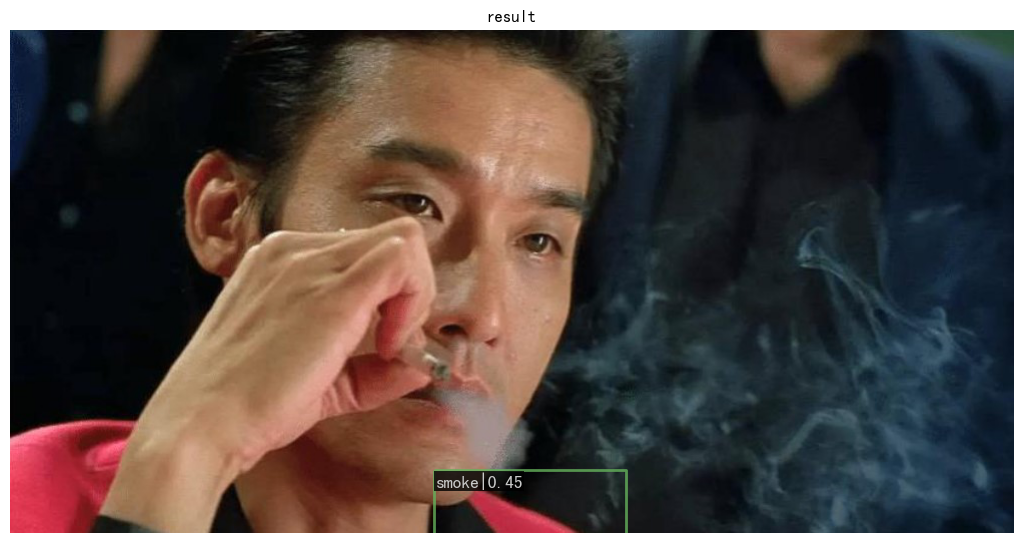

In [23]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import warnings
warnings.filterwarnings("ignore")

config_file = "work_dirs/yolov3/yolov3_mobilenetv2_mstrain-416_30e_bloods/yolov3_mobilenetv2_mstrain-416_30e_bloods.py"
checkpoint_file = "work_dirs/yolov3/yolov3_mobilenetv2_mstrain-416_30e_bloods/latest.pth"
img1 = 'test/test-smoke-1.jpg'
img2 = 'test/test-smoke-2.jpg'
device = 'cuda:0'

model = init_detector(config_file, checkpoint_file, device=device)
res1 = inference_detector(model, img1)
res2 = inference_detector(model, img2)
show_result_pyplot(model, img1, res1, score_thr=0, title='result', wait_time=0, palette=None, out_file=None)
show_result_pyplot(model, img2, res2, score_thr=0, title='result', wait_time=0, palette=None, out_file=None)